In [1]:
# Esercizio sulla regressione lineare semplice

In [2]:
import numpy as np

In [6]:
DATA = np.loadtxt("DATA_reg_lin.dat")
x = DATA[:,1]    # Peso corporeo
y = DATA[:,2]    # Pressione sistolica
display(x,y)

array([165., 167., 180., 155., 212., 175., 190., 210., 200., 149., 158.,
       169., 170., 172., 159., 168., 174., 183., 215., 195., 180., 143.,
       240., 235., 192., 187.])

array([130., 133., 150., 128., 151., 146., 150., 140., 148., 125., 133.,
       135., 150., 153., 128., 132., 149., 158., 150., 163., 156., 124.,
       170., 165., 160., 159.])

In [7]:
# Calcolo dei coefficienti di regressione y = b_0 + b_1 x

In [11]:
x_bar = np.mean(x)
y_bar = np.mean(y)
n = x.size

In [12]:
sig_xy = np.sum((x-x_bar)*(y-y_bar))/n
display(sig_xy)

247.00887573964494

In [13]:
sig_x_2 = np.sum((x-x_bar)**2.)/n
display(sig_x_2)

588.9363905325444

In [ ]:
b_0 = y_bar - sig_xy/sig_x_2*x_bar
b_1 = sig_xy/sig_x_2

In [17]:
xx = np.linspace(140.,240.,1000)
yy = b_0 + b_1*xx

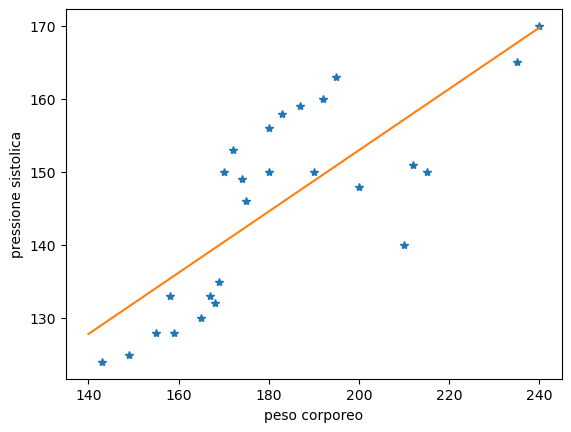

In [18]:
import matplotlib.pyplot as plt
plt.plot(x, y, '*')
plt.plot(xx, yy)
plt.xlabel('peso corporeo')
plt.ylabel('pressione sistolica')
plt.show()

In [19]:
# Calcolo dei residui
y_hat = b_0 + b_1*x
r = y - y_hat

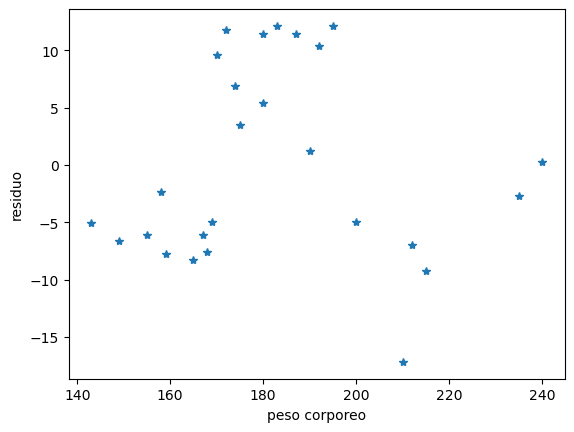

In [21]:
plt.plot(x, r, '*')
plt.xlabel('peso corporeo')
plt.ylabel('residuo')
plt.show()

In [24]:
s2 = np.sum(r**2.)/(n-2)
display(s2)

75.35719270439562

In [25]:
from scipy.stats import t
alpha = 0.05
T = t.ppf(1.-alpha/2.,n-2)
b_0_l = b_0 - np.sqrt(s2)*np.sqrt(1./n + x_bar**2./(n*sig_x_2))*T
b_0_r = b_0 + np.sqrt(s2)*np.sqrt(1./n + x_bar**2./(n*sig_x_2))*T

b_1_l = b_1 - np.sqrt(s2)/np.sqrt(n*sig_x_2)*T
b_1_r = b_1 + np.sqrt(s2)/np.sqrt(n*sig_x_2)*T

display(b_0)
display(b_0_l,b_0_r)

display(b_1)
display(b_1_l,b_1_r)

69.10437279118659

42.45917560573429

95.7495699766389

0.41941520291569645

0.2746281144802124

0.5642022913511805

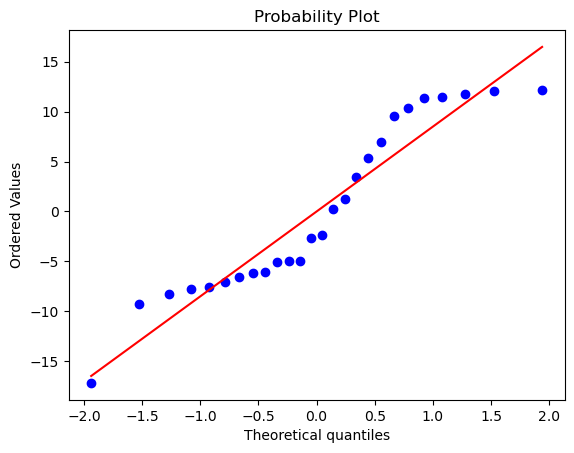

In [23]:
from scipy.stats import probplot
from scipy.stats import norm
fig, ax = plt.subplots(1, 1)
probplot(r, dist=norm, plot=ax)
plt.show()

In [26]:
# Test di significatività
# H0 : beta_1 = 0
# H1 : beta_1 <> 0

alpha = 0.05
T1 = np.sqrt(n)*b_1*np.sqrt(sig_x_2)/np.sqrt(s2)
display(T1)
T = t.ppf(1.-alpha/2.,n-2)
display(T)

5.9786438374879545

2.0638985616280205

In [27]:
# Si rigetta l'ipotesi nulla in favore di quella alternativa

In [29]:
# Calcolo del coefficiente di determinazione
sig_y_2 = np.sum((y-y_bar)**2.)/n
R2 = sig_xy**2./(sig_x_2*sig_y_2)
display(R2)

0.5982872450148403

In [ ]:
# Il modello di regressione non sembra essere adeguato